# Data Preprocessing

Data preprocessing includes tasks involved with filling, sampling, and normalizing data.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Working with Missing Data in pandas

We begin by defining a pandas dataframe that contains some cells with missing values. Note that pandas, in addition to allowing us to create dataframes from a variety of files, also supports explicit declaration of a DataFrame. We can pass in a dictionary of lists, the values of each list representing column values:

In [2]:
incomplete_df = pd.DataFrame({'id': [1, 2, 3, 2, 2, 3, 1, 1, 1, 2, 4],
                              'type': ['one', 'one', 'two', 'three', 'two', 'three', 'one', 'two', 'one', 'three','one'],
                              'amount': [345, 928, np.nan, 645, 113, 942, np.nan, 539, np.nan, 814, np.nan] 
                             }, columns=['id', 'type', 'amount'])

Column 'amount' is the only one with missing values.

In [3]:
print(incomplete_df)

    id   type  amount
0    1    one     345
1    2    one     928
2    3    two     NaN
3    2  three     645
4    2    two     113
5    3  three     942
6    1    one     NaN
7    1    two     539
8    1    one     NaN
9    2  three     814
10   4    one     NaN


We can identify missing fields using the `isnull()` method:

In [4]:
print(incomplete_df.isnull())

       id   type amount
0   False  False  False
1   False  False  False
2   False  False   True
3   False  False  False
4   False  False  False
5   False  False  False
6   False  False   True
7   False  False  False
8   False  False   True
9   False  False  False
10  False  False   True


Recall that summary statistics and arithmetic with missing data is natively supported by pandas. Let's define two series, both containing some missing values. We'll extract the first Series from the amount `column` of our DataFrame above and we'll create the second series from a list:

In [5]:
A = incomplete_df['amount']
B = pd.Series(data=[np.nan, 125, 335, 345, 312, np.nan, np.nan, 129, 551, 800, 222])

In [6]:
print(A)
print('\n')
print(B)

0     345
1     928
2     NaN
3     645
4     113
5     942
6     NaN
7     539
8     NaN
9     814
10    NaN
Name: amount, dtype: float64


0     NaN
1     125
2     335
3     345
4     312
5     NaN
6     NaN
7     129
8     551
9     800
10    222
dtype: float64


The mean is computed normally and missing values are ignored:

In [7]:
A.mean()

618.0

Functions to find the minimum, maximum, standard deviation, and variance all work even when data are missing:

In [8]:
print(B.min())
print(B.max())
print(B.std())
print(B.var())

125.0
800.0
226.90459763647678
51485.69642857143


We can also perform element-wise arithmetic operations between series with missing data. Note that by definition the result of any operation that involves missing values is `NaN`:

In [9]:
A + B

0      NaN
1     1053
2      NaN
3      990
4      425
5      NaN
6      NaN
7      668
8      NaN
9     1614
10     NaN
dtype: float64

### Filling Missing Values

Recall that pandas has a function that allows you to drop any rows in a DataFrame (or elements in a Series) that contain a missing value.

In [10]:
A

0     345
1     928
2     NaN
3     645
4     113
5     942
6     NaN
7     539
8     NaN
9     814
10    NaN
Name: amount, dtype: float64

In [11]:
A.dropna()

0    345
1    928
3    645
4    113
5    942
7    539
9    814
Name: amount, dtype: float64

#### Filling by Value

However, very often you may wish to fill in those missing values rather than simply dropping them. Of course, pandas also has that functionality. For example, we could fill missing values with a scalar number, as shown below.

In [12]:
A.fillna(-1)

0     345
1     928
2      -1
3     645
4     113
5     942
6      -1
7     539
8      -1
9     814
10     -1
Name: amount, dtype: float64

That actually works with any data type.

In [13]:
A.fillna('missing data')

0              345
1              928
2     missing data
3              645
4              113
5              942
6     missing data
7              539
8     missing data
9              814
10    missing data
Name: amount, dtype: object

#### Filling with Average Value

We can use this functionality to fill in the gaps with the average value computed across the non-missing values.

In [14]:
A.fillna(A.mean())

0     345
1     928
2     618
3     645
4     113
5     942
6     618
7     539
8     618
9     814
10    618
Name: amount, dtype: float64

Even better, if we want to fill in the gaps with mean values of corresponding *id's* (recall our initial dataframe printed below), the following two lines of code perform that seemingly complex task.

In [15]:
print(incomplete_df)

    id   type  amount
0    1    one     345
1    2    one     928
2    3    two     NaN
3    2  three     645
4    2    two     113
5    3  three     942
6    1    one     NaN
7    1    two     539
8    1    one     NaN
9    2  three     814
10   4    one     NaN


In [16]:
# Fill in gaps in the 'amount' column with means obtained from corresponding id's in the first column
incomplete_df["amount"].fillna(incomplete_df.groupby("id")["amount"].transform("mean"),inplace=True)
# If there is no corresponding id, simply use the overall mean
incomplete_df["amount"].fillna(incomplete_df["amount"].mean(), inplace=True)
print(incomplete_df)

    id   type  amount
0    1    one   345.0
1    2    one   928.0
2    3    two   942.0
3    2  three   645.0
4    2    two   113.0
5    3  three   942.0
6    1    one   442.0
7    1    two   539.0
8    1    one   442.0
9    2  three   814.0
10   4    one   615.2


#### Backward and Forward Filling

You can fill values forwards and backwards with the flags *pad* / *ffill* and *bfill* / *backfill*

In [17]:
print(B)
print('\n')
print(B.fillna(method='pad'))

0     NaN
1     125
2     335
3     345
4     312
5     NaN
6     NaN
7     129
8     551
9     800
10    222
dtype: float64


0     NaN
1     125
2     335
3     345
4     312
5     312
6     312
7     129
8     551
9     800
10    222
dtype: float64


We can set a limit if we only want to replace consecutive gaps.

In [18]:
B.fillna(method='bfill',limit=1)

0     125
1     125
2     335
3     345
4     312
5     NaN
6     129
7     129
8     551
9     800
10    222
dtype: float64

#### Interpolating Missing Values

There is also a function that does linear interpolation. The keyword *method* gives you access to fancier methods for interpolation, some of which require SciPy.

In [19]:
print(B)
print('\n')
print(B.interpolate())

0     NaN
1     125
2     335
3     345
4     312
5     NaN
6     NaN
7     129
8     551
9     800
10    222
dtype: float64


0     NaN
1     125
2     335
3     345
4     312
5     251
6     190
7     129
8     551
9     800
10    222
dtype: float64


In [20]:
B.interpolate(method='barycentric')

0            NaN
1     125.000000
2     335.000000
3     345.000000
4     312.000000
5     146.563492
6      -1.849206
7     129.000000
8     551.000000
9     800.000000
10    222.000000
dtype: float64

In [21]:
B.interpolate(method='pchip')

0            NaN
1     125.000000
2     335.000000
3     345.000000
4     312.000000
5     246.420420
6     167.376877
7     129.000000
8     551.000000
9     800.000000
10    222.000000
dtype: float64

#### Comparison of Methods to Fill Missing Values

Below we compare three different methods.

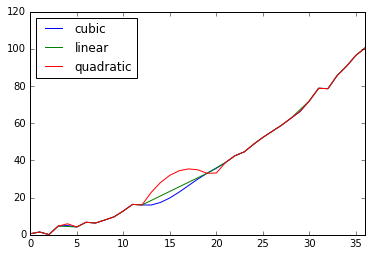

In [22]:
np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, .25)**2 + np.random.randn(37))
bad = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[bad] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

## Sampling Instances

We begin by defining a pandas DataFrame. Note that in addition to allowing us to create a DataFrame from a variety of types of files, pandas also supports explicit declaration of a DataFrame.

In [23]:
df = pd.DataFrame(np.arange(5 * 4).reshape(5, 4))
print(df)

    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19


#### Random Sampling without Replacement

To select a random subset without replacement, one way is to slice off the first *k* elements of the array returned by permutation, where *k* is the desired subset size. Here, we use the 'take' method, which retrieves elements along a given axis at the given indices. Using this function, we slice off the first three elements:

In [24]:
df_sampled_without_replacement = df.take(np.random.permutation(df.shape[1])[:3], axis=0)
print(df_sampled_without_replacement)

    0   1   2   3
0   0   1   2   3
1   4   5   6   7
3  12  13  14  15


#### Random Sampling with Replacement

To generate a sample with replacement, we can draw random integers.

In [25]:
sampler = np.random.randint(0, len(df), size=3)
print(sampler)

[0 3 0]


These random integers can be used as input for the 'take' method, which is then used to sample the data. Since the random integers consistuting the array may be repeated, the rows sampled by this method may also be repeated -- or, in other words, sampled with replacement.

In [26]:
df_sampled_with_replacement = df.take(sampler)
print(df_sampled_with_replacement)

    0   1   2   3
0   0   1   2   3
3  12  13  14  15
0   0   1   2   3


## Data Normalization and Standardization

Aside from filling in missing values and sampling data, we may also want to normalize or standardize our data.

In [27]:
df_norm = df / df.sum().astype('float')
print(df_norm)

     0         1     2         3
0  0.0  0.022222  0.04  0.054545
1  0.1  0.111111  0.12  0.127273
2  0.2  0.200000  0.20  0.200000
3  0.3  0.288889  0.28  0.272727
4  0.4  0.377778  0.36  0.345455


In [28]:
perm = np.random.permutation(len(df))
print(perm)

[1 3 0 4 2]


In [29]:
df_permuted = df.take(perm)
print(df_permuted)

    0   1   2   3
1   4   5   6   7
3  12  13  14  15
0   0   1   2   3
4  16  17  18  19
2   8   9  10  11


In [30]:
df_permuted_norm = df_permuted / df_permuted.sum().astype('float')
print(df_permuted_norm)

     0         1     2         3
1  0.1  0.111111  0.12  0.127273
3  0.3  0.288889  0.28  0.272727
0  0.0  0.022222  0.04  0.054545
4  0.4  0.377778  0.36  0.345455
2  0.2  0.200000  0.20  0.200000


## Example with the Iris Dataset

We will use the "Iris dataset" as an example for employing these methods. The Iris flower dataset or Fisher's Iris dataset is a well-known multivariate dataset introduced by Sir Ronald Fisher in 1936 as an example of discriminant analysis, a method for finding a linear combination of features that characterizes or separates two or more classes of objects or events. Fischer is famous for helping to develop the foundation for modern statistical science, and his method of linear discriminant analysis is perhaps the earliest classification method.

Let's fetch the Iris dataset from the UCI Machine Learning repository.

In [31]:
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)

In [32]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


When read directly from the UCI Machine Learning repository, the Iris dataset has an extra line at the bottom that is read by pandas as a row of null values. Let's drop this final line:

In [33]:
iris_data = data.dropna()

To visualize this data, we can create a scatter plot matrix. In pandas, the scatter_matrix function generates a matrix of pairwise scatterplots, optiorally with histograms (or kernel density estimates) on the diagonal. Here's the scatter plot matrix with histograms on the diagonal:

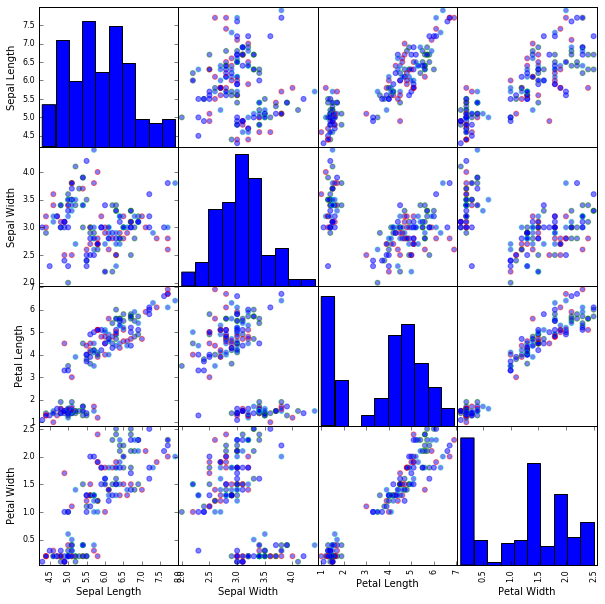

In [34]:
my_colors = ['g', 'b', 'r', 'c']
pl1 = pd.tools.plotting.scatter_matrix(iris_data, figsize=(10,10), color=my_colors, s=100)

We can also use boxplots to visualize the variability of each feature:

/Users/reidjohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


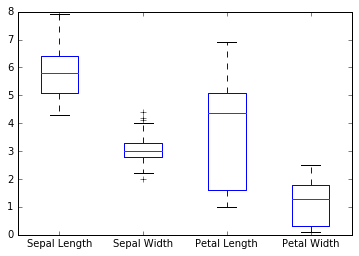

In [35]:
pl2 = iris_data.boxplot(grid=False)

Notice that Sepal Width has several outliers. In certain circumstances, it may be beneficial to remove these outliers. In this example, we interpolate over these outliers, replacing them with values that are more likely given the other data:

In [36]:
iris_data['Sepal Width'] = np.where((iris_data['Sepal Width'] > 4) | \
                                    (iris_data['Sepal Width'] < 2.1), np.nan, iris_data['Sepal Width'])
iris_data['Sepal Width'] = iris_data['Sepal Width'].interpolate()

/Users/reidjohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


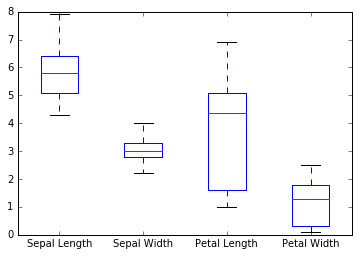

In [37]:
pl3 = iris_data.boxplot(grid=False)

With outliers removed, we may now be interested in sampling the data. Here, we use sampling with replacement to select 100 instances from the dataset:

In [38]:
sampler = np.random.randint(0, len(iris_data), size=100)
iris_data = iris_data.take(sampler)
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
138,6.0,3.00,4.8,1.8,Iris-virginica
40,5.0,3.50,1.3,0.3,Iris-setosa
34,4.9,3.10,1.5,0.1,Iris-setosa
60,5.0,2.85,3.5,1.0,Iris-versicolor
137,6.4,3.10,5.5,1.8,Iris-virginica


Now with the data cleaned and sampled, we may be interested in standardizing the data. Here, we use z-score normalization to rescale each feature. z-score normalization converts all features to a common scale with an average of zero and standard deviation of one:

In [39]:
iris_data = iris_data.groupby('Name').transform(lambda x: (x-x.mean()) / x.std(ddof=1))

Using boxplots once again, now we can see that each feature has been normalized, with each feature displaying an average of zero and a standard deviation of one:

/Users/reidjohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


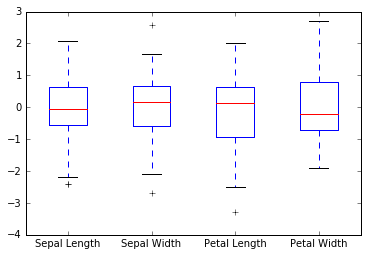

In [40]:
pl4 = iris_data.boxplot(grid=False)

Visualizating the data with a scatter plot matrix once again, we can now observe dramatic changes in the data. Each feature now displays a histogram that more closely resembles a normal distribution. Additionally, the separation previously observable in the scatter plots is now largely absent.

Depending on the objectives, these changes could be beneficial or detrimental. The use of data sampling, outlier removal, and data normalization are steps that depend critically on purpose of analysis and the methods being employed.

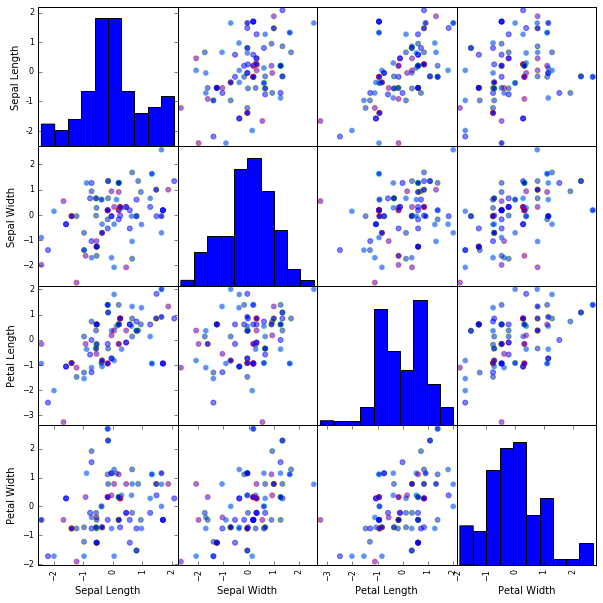

In [41]:
pl5 = pd.tools.plotting.scatter_matrix(iris_data, diagonal='hist', figsize=(10,10), color=my_colors, s=100)

## Feature Selection

Feature selection is the process of reducing the number of random variables (features) under consideration by creating a subset. Feature selection can help to reduce computational load and improve inference by eliminating features that are not sufficiently useful. Here, we demonstrate feature selection using mutual information on the Iris dataset.

In [42]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df_iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)
print(df_iris.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width         Name
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [43]:
X = df_iris.iloc[:, :-1]
y = df_iris.iloc[:, -1]

Mutual information is a measure of the mutual dependence between the two variables. It quantifies the amount of information obtained about one variable, here the dependent variable (y), through another random variable, here the independent variable (X). We can calculate the mutual information between feature in X and the class variable y:

In [44]:
mi = mutual_info_classif(X, y)
print(mi)

[ 0.49963856  0.21849825  0.99131263  0.98182468]


The higher the amount of information, the more informative that feature is with respect to our class variable. We can then uses these as scores by which to select features, only keeping the top k features as measured by this score:

In [45]:
# Select the k best features.
selector = SelectKBest(mutual_info_classif, k=2)
selector.fit(X, y)

# Get indices of columns to keep.
idxs_selected = selector.get_support(indices=True)

# Create new DataFrame with only desired columns.
X_new = X[idxs_selected]

# Top 2 features.
print(X_new.head())

   Petal Length  Petal Width
0           1.4          0.2
1           1.4          0.2
2           1.3          0.2
3           1.5          0.2
4           1.4          0.2


## Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of random variables (features) under consideration by creating a new set of features, typically smaller than the previous set. The process of dimensionality reduction has a variety of data science applications. Here, we demonstrate dimensionality reduction using PCA and LLE on the Optical Recognition of Handwritten Digits dataset and PCA and *k*-means clustering on the Olivetti faces dataset.

To begin, let's import some libraries we will be needing:

In [46]:
# PCA code modified from authors:
#          Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

# LLE code modified from author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
# License: BSD 3 clause (C) INRIA 2011

# Eigenfaces code modified from authors:
#          Vlad Niculae
#          Alexandre Gramfort
# License: BSD 3 clause

from time import time
from sklearn import (cluster, datasets, decomposition, ensemble, lda, manifold, random_projection)
from mpl_toolkits.mplot3d import Axes3D # needed to modify the way figure behaves

/Users/reidjohnson/anaconda/lib/python3.5/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


Now, let's load the Optical Recognition of Handwritten Digits dataset (hereafter referred to as the "digits" dataset), which is composed of handwritten digits between 0 and 9 stretched into a rectangular 16x16 box. More information on this dataset can found [here](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Conveniently, scikit-learn has a predefined function to help us load this dataset. Here, we load 6 classes (the digits 0 through 5), setting the explanatory (or independent or feature) variables as X, and the target (or dependent or class) variable as y.

In [47]:
# Load the digits dataset.

digits = datasets.load_digits(n_class=6) # load the dataset with 6 classes (digits 0 through 5)
X = pd.DataFrame(digits.data) # explanatory (or independent or feature) variables
y = pd.Series(digits.target) # target (or dependent or class) variable
n_samples, n_features = X.shape # the number of rows (samples) and columns (features)

In [48]:
print(X.head())

   0   1   2   3   4   5   6   7   8   9  ...  54  55  56  57  58  59  60  61  \
0   0   0   5  13   9   1   0   0   0   0 ...   0   0   0   0   6  13  10   0   
1   0   0   0  12  13   5   0   0   0   0 ...   0   0   0   0   0  11  16  10   
2   0   0   0   4  15  12   0   0   0   0 ...   5   0   0   0   0   3  11  16   
3   0   0   7  15  13   1   0   0   0   8 ...   9   0   0   0   7  13  13   9   
4   0   0   0   1  11   0   0   0   0   0 ...   0   0   0   0   0   2  16   4   

   62  63  
0   0   0  
1   0   0  
2   9   0  
3   0   0  
4   0   0  

[5 rows x 64 columns]


Let's see what this dataset looks like. To do this, we transform the rows (which each have 64 features, representing the individual pixels that comprise the image of a digit) into an 8x8 segment of an array, which we then plot as a figure. We do this for the first 400 digits (rows) in the dataset.

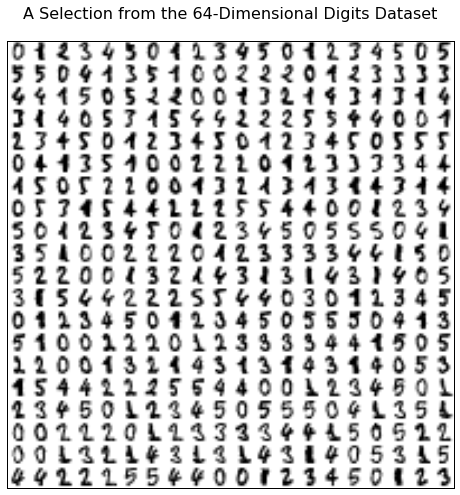

In [49]:
# Plot images of the digits.

n_img_per_row = 20 # number of digits per row
img = np.zeros((10*n_img_per_row, 10*n_img_per_row)) # generate a new 200x200 array filled with zeros
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        # Set each 8x8 area of the img to the values of each row (reshaped from 1x64 to 8x8).
        img[ix:ix+8, iy:iy+8] = X.iloc[i*n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(8, 8), dpi=250) # define a figure, with size (width and height) and resolution
#axes(frameon = 0) # remove the frame/border from the axes
plt.imshow(img, cmap=plt.cm.binary) # show the image using a binary color map
plt.xticks([]) # no x ticks
plt.yticks([]) # no y ticks
plt.title('A Selection from the 64-Dimensional Digits Dataset\n', fontsize=16)

Now we would like to perform some dimensionality reduction on this dataset and visualize the results of these transformations. We can combine the visualization process for various dimensionality reduction techniques into a single function. The plot embedding function defined below takes care of details related to the visualization of the results of dimensionality reduction techniques when run on the digits dataset. In our visualization, each digit will be displayed using a different color within the reduced feature space.

Generally, PCA requires centering the data (i.e., subtracting the mean from each data point for each feature), because otherwise the first component may not truly describe the largest direction of variation in the data, but rather the mean of the data.

In [50]:
# Scale and visualize the embedding vectors.

def plot_embedding(X, title=None):
    # min-max normalization
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]), color=plt.cm.Set1(y[i] / 10.), 
                fontdict={'weight': 'bold', 'size': 12})

    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # Only print thumbnails with matplotlib > 1.0.
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 5e-3:
                # Don't show points that are too close together.
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = matplotlib.offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r, zoom=1.25)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i])
            ax.add_artist(ab)
    plt.xticks([]), plt.yticks([])
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])

    if title is not None:
        plt.title(title, fontsize=16)

Now that we have a means of easily visualizing the results of dimensionality reduction, let's generate a random projection of the dataset into fewer dimensions and visualize the results. Here, we are reducing the dataset from 64 features (or dimensions) to 2, and visualizing how similar the digits are to one another when represented by these 2 features. We can generate this projection using a sparse random projection, which projects the original input (feature) space using a sparse random matrix. As a result, we can view the data along 2 new dimensions (or axes), which have been randomly generated. Digits that are closer together in this 2-dimensional space have values that are more similar along these two axes. Note that these 2 axes may not correspond to any of the axes defined by the original 64 features. In other words, each dimension here may be viewed as some combination of the original features.

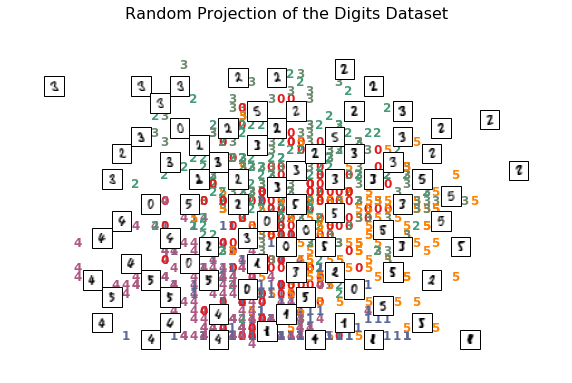

In [51]:
# Random 2D projection using a random unitary matrix.

#print("Computing random projection"),
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
#print("done.")

# Plot random projection result.
plot_embedding(X_projected, "Random Projection of the Digits Dataset\n")

### Principal Component Analysis (PCA)

Now, let's perform principal component analysis (PCA) to project the data into fewer dimensions. In PCA, the projection is defined by principal components (eigenvectors), each of which can be viewed as a linear combination of the original features that corresponds to a dimension in the projection. The projection is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components. Each principal component (eigenvector) is associated with an eigenvalue, which corresponds to the amount of the variance explained by that component.

Dimensionality reduction is a one-way transformation that induces a loss of information. We can try to minimize the loss of information while retaining the benefits of dimensionality reduction by trying to find the number of principal components needed to effectively represent the original dataset. This number can often be determined by the "elbow" or "knee" point, which is considered to be the natural break between the useful principal components (or dimensions) and residual noise. We can find the elbow point by computing PCA on our dataset and observing the number of principal components after which the amount of variance explained displays a natural break or drop-off.

Since performing PCA on our dataset will generate so many principal components, here we only look at the amount of variance explained by the first 8 components.

In [52]:
# Projection onto the first 8 principal components.

# Global centering.
X_centered = X - X.mean()
    
#print("Computing PCA projection..."),
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_centered)
#print("done.")

print(pca.explained_variance_ratio_)

[ 0.19268752  0.16491423  0.11496179  0.08523838  0.05260763  0.04703754
  0.03596583  0.031112  ]


We can generate a bar plot to help visualize these results. More precisely, here our bar plot is considered a scree plot, which graphs the eigenvalue (each of which correspond to an amount of explained variance) against the component number (each of which correspond to a dimension or axis) to help determine an appropriate number of principal components. To determine the appropriate number of components, we look for an "elbow" in the scree plot, the point at which the remaining eigenvalues are relatively small and all about the same size.

In our scree plot, we can see that there is a relatively large drop-off in the explained variance after the second component. We can consider this to be the elbow point. Note that we simply color the bars in the scree plot for aesthetic purposes.

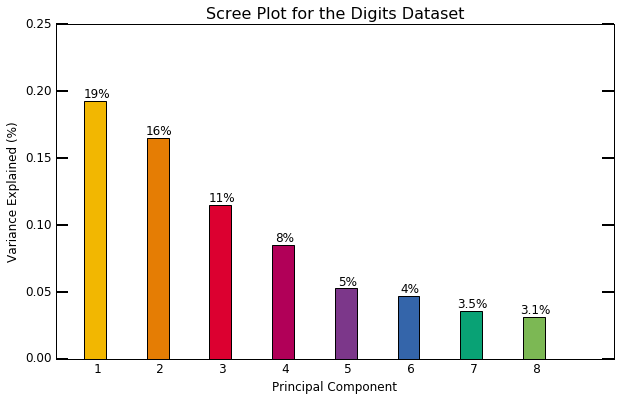

In [53]:
# Generate scree plot.

N = 8
ind = np.arange(N)  # the x locations for the groups

vals = [0.19268752,
        0.16491423,
        0.11496179,
        0.08523838,
        0.05260764,
        0.04703754,
        0.03596589,
        0.03111252]

plt.figure(figsize=(10, 6), dpi=250)
ax = plt.subplot(111)
ax.bar(ind, pca.explained_variance_ratio_, 0.35, 
       color=[(0.949, 0.718, 0.004),
              (0.898, 0.49, 0.016),
              (0.863, 0, 0.188),
              (0.694, 0, 0.345),
              (0.486, 0.216, 0.541),
              (0.204, 0.396, 0.667),
              (0.035, 0.635, 0.459),
              (0.486, 0.722, 0.329),
             ])

ax.annotate(r"%d%%" % (int(vals[0]*100)), (ind[0]+0.2, vals[0]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[1]*100)), (ind[1]+0.2, vals[1]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[2]*100)), (ind[2]+0.2, vals[2]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[3]*100)), (ind[3]+0.2, vals[3]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[4]*100)), (ind[4]+0.2, vals[4]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[5]*100)), (ind[5]+0.2, vals[5]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%s%%" % ((str(vals[6]*100)[:4 + (0-1)])), (ind[6]+0.2, vals[6]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%s%%" % ((str(vals[7]*100)[:4 + (0-1)])), (ind[7]+0.2, vals[7]), va="bottom", ha="center", fontsize=12)

ax.set_xticklabels(('       0',
                    '       1',
                    '       2',
                    '       3',
                    '       4',
                    '       5',
                    '       6',
                    '       7',
                    '       8'), 
                   fontsize=12)
ax.set_yticklabels(('0.00', '0.05', '0.10', '0.15', '0.20', '0.25'), fontsize=12)
ax.set_ylim(0, .25)
ax.set_xlim(0-0.45, 8+0.45)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Principal Component", fontsize=12)
ax.set_ylabel("Variance Explained (%)", fontsize=12)

plt.title("Scree Plot for the Digits Dataset", fontsize=16)

Based upon the scree plot, we can see that retaining 2 components seems appropriate for this dataset. Thus, we can perform PCA again, this time only retaining the top 2 components (alternatively, we could simply remove the remaining components from the original PCA computation). Conveniently, the 2 remaining principal components correspond to 2 dimensions or axes, which we can easily visualize using the plot embedding function we defined previously.

Notice that the 2 dimensions generated by PCA (displayed below) seem to organize the data more effectively than the random projection we initially performed.

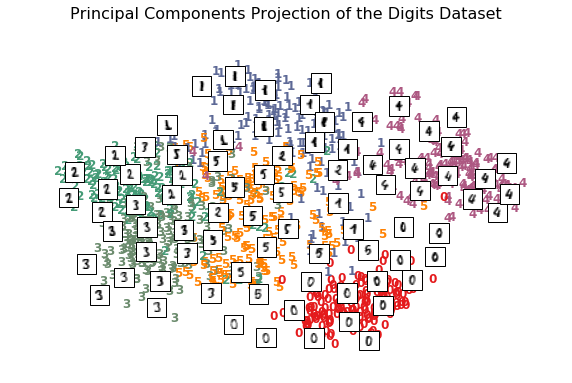

In [54]:
# Compute (two-dimensional) PCA on the digits dataset.

#print("Computing PCA projection..."),
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)
#print("done.")

# Plot PCA result.
plot_embedding(X_pca, "Principal Components Projection of the Digits Dataset\n")

### Locally Linear Embedding (LLE)

As might be expected, PCA is not the only method for reducing the dimensionality of a dataset. Another popular method we may use to project our dataset into 2 dimensions is known as locally linear embedding (LLE). LLE finds a set of the nearest neighbors of each point, computes a set of weights for each point that best describe the point as a linear combination of its neighbors, and then finds the low-dimensional embedding of points such that each point is still described with the same linear combination of its neighbors. Whereas in PCA each principal component is a straight line along which the data's projections have the most variance, LLE performs a different linear dimensionality reduction at each point (because locally a manifold appears linear) and then combines these linear representations with minimal discrepancy to approximate non-linear structure.

The 2 dimensions generated by LLE (using a set of 30 nearest neighbors for each point) are displayed below. Notice that, given that our digits dataset doesn't have any particular non-linear structure (i.e., the digits are oriented the same way), the organization of the projection doesn't appear to be better (and may even be worse) than that generated by PCA.

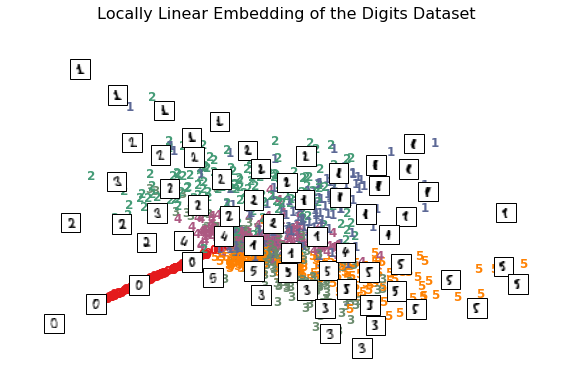

In [55]:
# Compute (two-dimensional) LLE on the digits dataset.

#print("Computing LLE..."),
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='standard')
X_lle = clf.fit_transform(X)
#print("done. Reconstruction error: %g" % clf.reconstruction_error_)

# Plot LLE result.
plot_embedding(X_lle, "Locally Linear Embedding of the Digits Dataset\n")

Let's see how LLE performs on a dataset with predominantly non-linear structure. Conveniently, scikit-learn provides a function to generate a Swiss roll, a 3-dimensional non-linear dataset that resembles the culinary delight of the same name. Here, we generate a Swiss roll dataset of 1,500 points.

In [56]:
# Generate the Swiss roll.

X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

We can visualize the Swiss roll dataset using a 3-dimensional figure. 

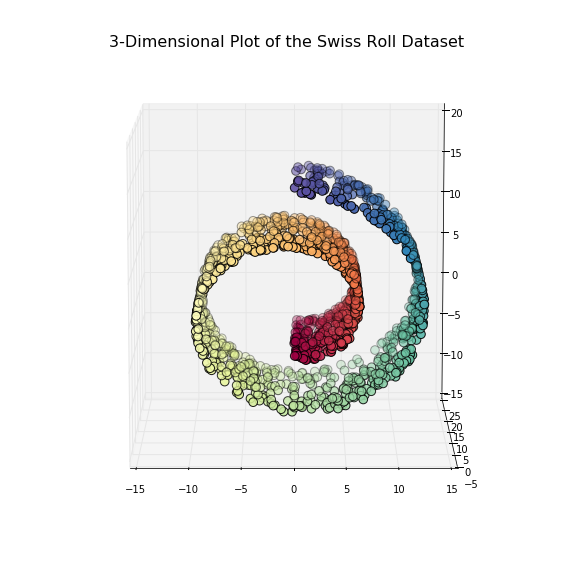

In [57]:
# Plot the Swiss roll.

fig = plt.figure(figsize=(10, 20))

# compatibility matplotlib < 1.0
ax = fig.add_subplot(111, projection='3d')
ax.azim = -90
ax.elev = 10
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=75, c=color, cmap=plt.cm.Spectral)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.axis('scaled')

plt.title("3-Dimensional Plot of the Swiss Roll Dataset", fontsize=16)

Now we compute LLE on this dataset, retaining just 2 dimensions, which we plot as a figure. Notice how the 3-dimensional structure of the points (that is, similarly-colored points being close together) is maintained by the 2-dimensional LLE projection.

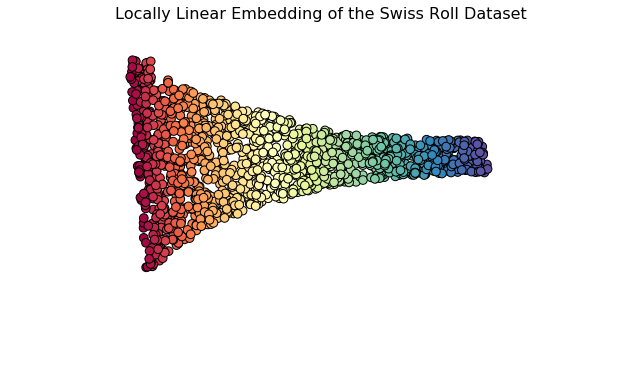

In [58]:
# Compute (two-dimensional) LLE on the Swiss roll dataset.

#print("Computing LLE..."),
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)
#print("done. Reconstruction error: %g" % err)

# Plot LLE result.
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)

ax.scatter(X_r[:, 0], X_r[:, 1], s=75, c=color, cmap=plt.cm.Spectral)
plt.axis('off')

plt.title("Locally Linear Embedding of the Swiss Roll Dataset", fontsize=16)

Now we compute PCA on this dataset, retaining just 2 dimensions, which we plot as a figure. Notice how the 3-dimensional structure of the points (that is, similarly-colored points being close together) is not maintained by the 2-dimensional PCA projection. Instead, the structure is lost, with the points appearing relatively disorganized. This is because PCA cannot account for the non-linear structure (the curvature) of this dataset, whereas LLE can account for this property. You can think of LLE as unraveling the Swiss roll, whereas PCA is flattening the Swiss roll. 

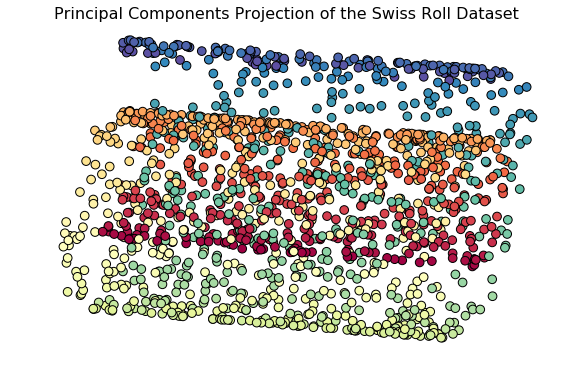

In [59]:
# Compute (two-dimensional) PCA on the Swiss roll dataset.

#print("Computing PCA..."),
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
#print("done.")

# Plot PCA result.

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)

ax.scatter(X_pca[:, 0], X_pca[:, 1], s=75, c=color, cmap=plt.cm.Spectral)
plt.axis('off')
plt.xticks([]), plt.yticks([])

plt.title("Principal Components Projection of the Swiss Roll Dataset", fontsize=16)

### Using PCA for Computer Vision (Eigenfaces)

So far, we've shown PCA as a way of addressing the curse of dimensionality (the general problems associated with high-dimensional data). However, dimensionality reduction techniques like PCA have more application-specific uses as well.

Consider the computer vision problem of human face recognition. The task of face recognition involves addressing the variation in a collection of face images. Intuitively, we could distinguish between faces by observing how the parts of different faces (facial features) differ. However, this approach can become intractable for large datasets. Fortunately, this is not the only approach.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic manner. In the same way that a set of principal components can represent a set of features, the eigenfaces represent characteristic features of the face images. Any particular face image can be reconstructed from the eigenfaces if one adds up all the eigenfaces (features) in the right proportion. If a particular feature represented by a particular eigenface is present in the original face image to a higher degree, the share of the corresponding eigenface in the "sum" of the eigenfaces should be greater. The reconstructed original face image, then, is equal to a sum of all eigenfaces, with each eigenface having a certain weight. This weight specifies to what degree the specific feature (eigenface) is present in the original face image.

If one uses all the eigenfaces extracted from original face images, one can reconstruct the original images from the eigenfaces exactly. But just like we used only the subset of principal components prior to the elbow point to approximate a dataset, one can also use fewer eigenfaces to generate approximations of the original face images. So in the same way that a smaller set of principal components can represent a larger set of original features, the eigenfaces technique produces dimensionality reduction by using a smaller set of eigenfaces to represent the original face images. Classification, then, can be achieved by comparing how face images are represented by the reduced set of eigenfaces, just as we compared points as represented by the reduced set of principal components.

Conveniently, scikit-learn provides a function to fetch the Olivetti faces dataset, a dataset that contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. We can use this set of face images to demonstrate the use of eigenfaces.

In [60]:
# Load and normalize faces dataset.

n_row, n_col = 2, 3 # the number of rows and columns of faces to display
n_components = n_row * n_col # the number of components to generate
image_shape = (64, 64) # the image dimensions (width and height)

# Load faces data.
rng = np.random.RandomState(0)
faces = datasets.fetch_olivetti_faces(shuffle=True, random_state=rng).data

n_samples, n_features = faces.shape # the number of rows (samples) and columns (features)

# Global centering.
faces_centered = faces - faces.mean(axis=0)

# Local centering.
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces." % n_samples)

Dataset consists of 400 faces.


Next, we can define a function to generate visualizations for the faces.

In [61]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

Now, let's view the first few images in the original dataset, before any preprocessing.

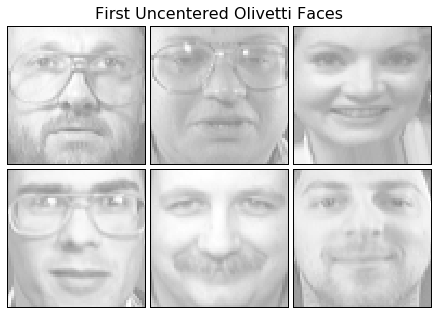

In [62]:
# Plot a sample of the uncentered input data.

plot_gallery("First Uncentered Olivetti Faces", faces[:n_components])

Generally, PCA requires centering the data (i.e., subtracting the mean from each data point for each feature), because otherwise the first component may not truly describe the largest direction of variation in the data, but rather the mean of the data. Below, we show the first few images in the dataset after the data has been centered. The effects of centering the data are clearly visible.

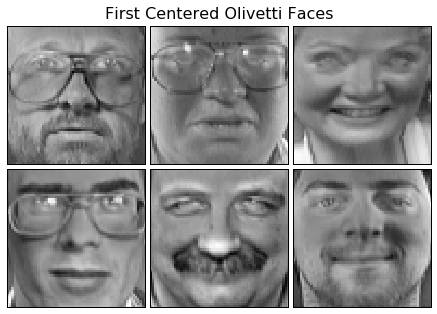

In [63]:
# Plot a sample of the input data.

plot_gallery("First Centered Olivetti Faces", faces_centered[:n_components])

Next, we use PCA to generate eigenfaces, which we display below. Here, we generate 6 eigenfaces, which should in combination be able to approximate the original 400 face images in the dataset. Each of these eigenfaces is a linear combination of the features of the original face images.

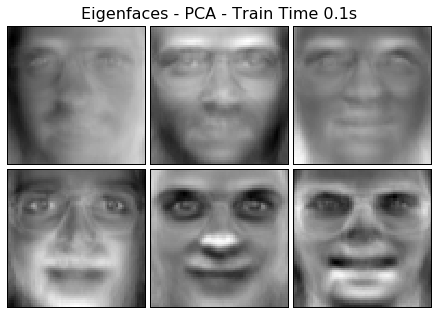

In [64]:
# Compute PCA on the dataset.

name = "Eigenfaces - PCA" # estimator name
estimator = decomposition.PCA(n_components=n_components, whiten=True) # estimator
center = True # whether the transformer uses the clustering API

#print("Extracting the top %d %s..." % (n_components, name)),
t0 = time()
data = faces
if center:
    data = faces_centered
estimator.fit(data)
train_time = (time() - t0)
#print("done in %0.3fs" % train_time)

if hasattr(estimator, 'cluster_centers_'):
    components_ = estimator.cluster_centers_
else:
    components_ = estimator.components_

plot_gallery('%s - Train Time %.1fs' % (name, train_time), components_[:n_components])

Finally, we use (mini batch) *k*-means clustering to generate clusters (or groups) of face images. Here, we generate 6 clusters, which should identify 6 groupings of the original 400 face images in the dataset. We plot the cluster centers below. Clustering the faces using *k*-means accomplishes a goal similar to eigenfaces, but in a different way. We use it here simply as an alternative to the eigenfaces approach by which to illustrate contrasting results.

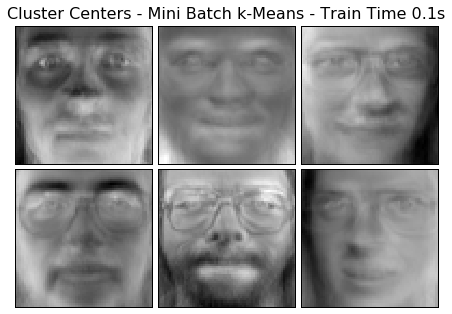

In [65]:
# Compute (mini batch) k-means clustering on the dataset.

name = "Cluster Centers - Mini Batch k-Means"
estimator = cluster.MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20, max_iter=50, random_state=rng)
center = True

#print("Extracting the top %d %s..." % (n_components, name)),
t0 = time()
data = faces
if center:
    data = faces_centered
estimator.fit(data)
train_time = (time() - t0)
#print("done in %0.3fs" % train_time)

if hasattr(estimator, 'cluster_centers_'):
    components_ = estimator.cluster_centers_
else:
    components_ = estimator.components_

plot_gallery('%s - Train Time %.1fs' % (name, train_time), components_[:n_components])

## Housing Dataset

Let's practice applying what we've learned to a house price dataset for Ames, Iowa.

In [66]:
df_houses = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')
print(df_houses.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL           141     31770   Pave   
1      2  526350040           20        RH            80     11622   Pave   
2      3  526351010           20        RL            81     14267   Pave   
3      4  526353030           20        RL            93     11160   Pave   
4      5  527105010           60        RL            74     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    20

In [67]:
X = df_houses.iloc[:, :-1]
y = df_houses.iloc[:, -1]

### 1. Replace the missing values in the column `Fence` with the string `'None'`:

In [68]:
# Code goes here.

### 2. Select the top ten features most predictive of the column `SalePrice` using mutual information.

In [69]:
# Code goes here.

### 3. Use PCA to reduce the remaining set of ten features to the top 3 principal components.

In [70]:
# Code goes here.